<a href="https://colab.research.google.com/github/raghav987/Application-of-ML-in-economics/blob/master/Code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [ ]:
data = pd.read_csv('input.csv',decimal=',')
print('number of missing data:')
print(data.isnull().sum())
data.describe(include='all')

number of missing data:
Country                0
Region                 0
Population             0
GDP ($ per capita)     1
Literacy (%)          18
Agriculture           15
Industry              16
Service               15
dtype: int64


,Country,Region,Population,GDP ($ per capita),Literacy (%),Agriculture,Industry,Service
count,227,227,2.270000e+02,226.000000,209.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN
top,South Africa,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,9689.823009,82.838278,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,10049.138513,19.722173,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,500.000000,17.600000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,1900.000000,70.600000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,5550.000000,92.500000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,15700.000000,98.000000,0.221000,0.341000,0.678500


In [ ]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [ ]:
#for col in data.columns.values:
#    if data[col].isnull().sum() == 0:
#        continue
#    if col == 'Climate':
#        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
#    else:
#        guess_values = data.groupby('Region')[col].median()
#    for region in data['Region'].unique():
#        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

In [ ]:
LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data.groupby(Region')

,Country,Region,Population,GDP ($ per capita),Literacy (%),Agriculture,Industry,Service,Region_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,700.0,36.0,0.380,0.240,0.380,0
1,Albania,EASTERN EUROPE,3581655,4500.0,86.5,0.232,0.188,0.579,3
2,Algeria,NORTHERN AFRICA,32930091,6000.0,70.0,0.101,0.600,0.298,6
3,American Samoa,OCEANIA,57794,8000.0,97.0,NaN,NaN,NaN,8
4,Andorra,WESTERN EUROPE,71201,19000.0,100.0,NaN,NaN,NaN,10


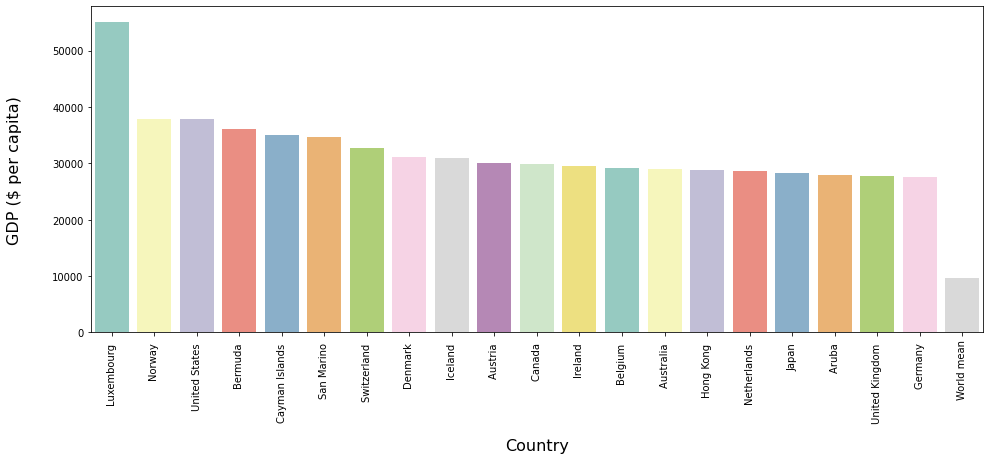

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

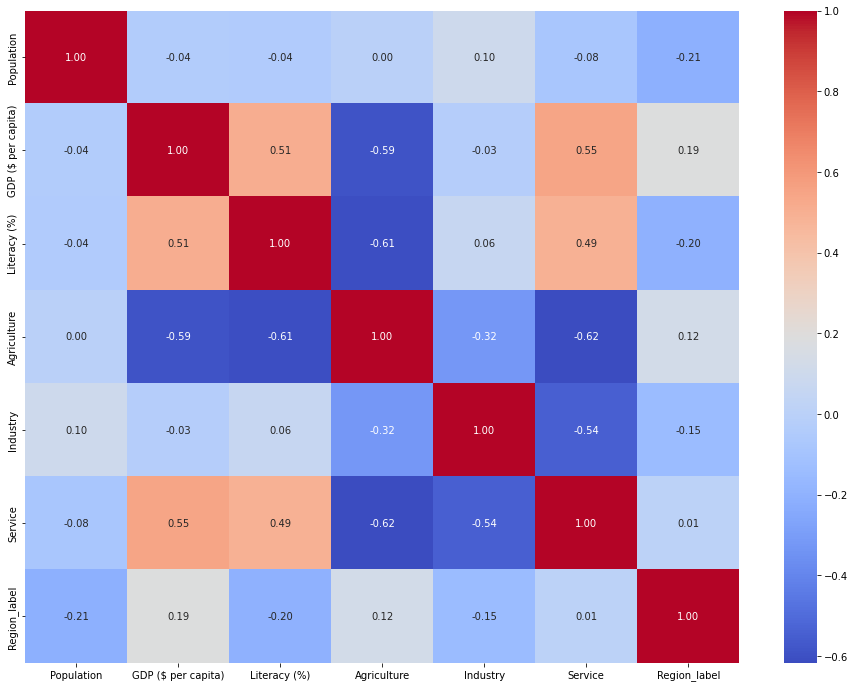

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


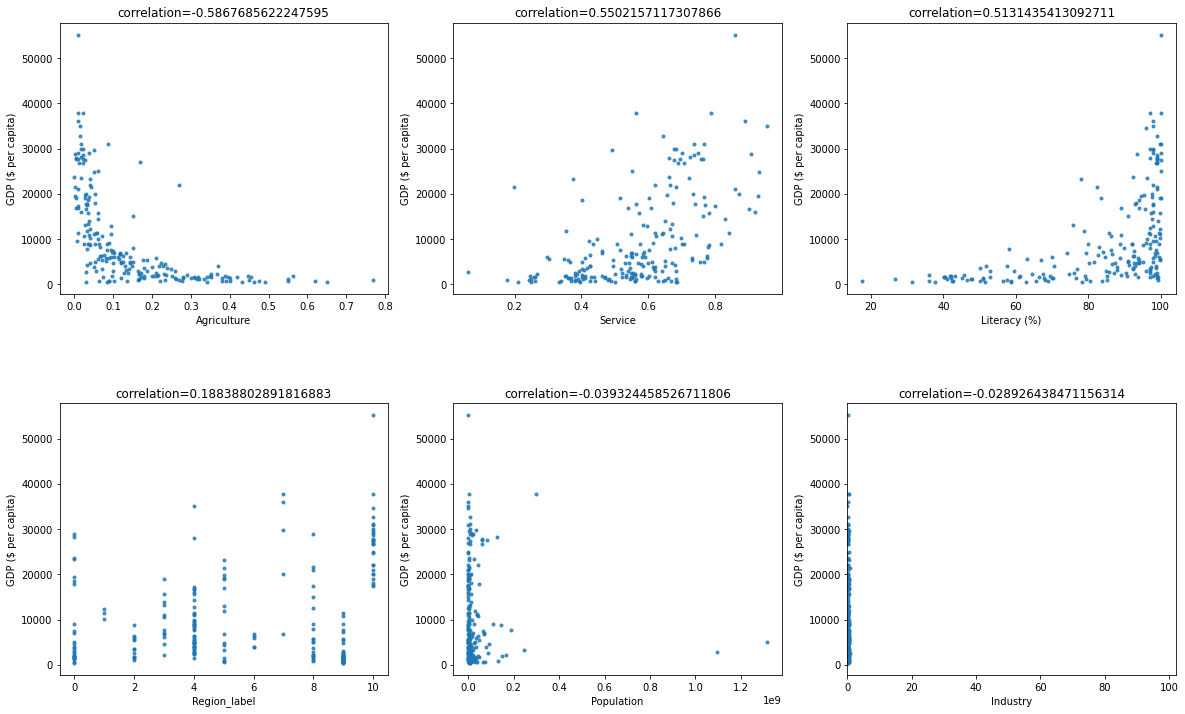

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data, ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [ ]:
training_features = ['Region','Population',
                     'GDP ($ per capita)','Literacy (%)',
                     'Agriculture','Industry',
                     'Service']
target = 'GDP ($ per capita)'
X = data[training_features]
Y = data[target]

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
np.nan_to_num(X)
np.nan_to_num(Y)

train_X, test_X,train_Y,test_Y = train_test_split(X,Y, test_size=0.3, shuffle=True)
train_X.head()

,Region,Population,GDP ($ per capita),Literacy (%),Agriculture,Industry,Service
130,0.0,60422,1600.0,93.7,0.317,0.149,0.534
206,0.0,70413958,6700.0,86.5,0.117,0.298,0.585
5,0.0,12127071,1900.0,42.0,0.096,0.658,0.246
100,0.0,6352117,19800.0,95.4,0.026,0.317,0.657
94,0.0,1095351995,2900.0,59.5,0.186,0.276,0.538


In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 3.2798065949303284e-12 msle_train: 2.61622224263171e-30
rmse_test: 3.986587745264883e-12 msle_test: 2.4580448496017035e-30


In [ ]:
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)


rmse_train: 1912.840765656693 msle_train: 0.4076492150272322
rmse_test: 1217.2312300955523 msle_test: 0.02375745907403671


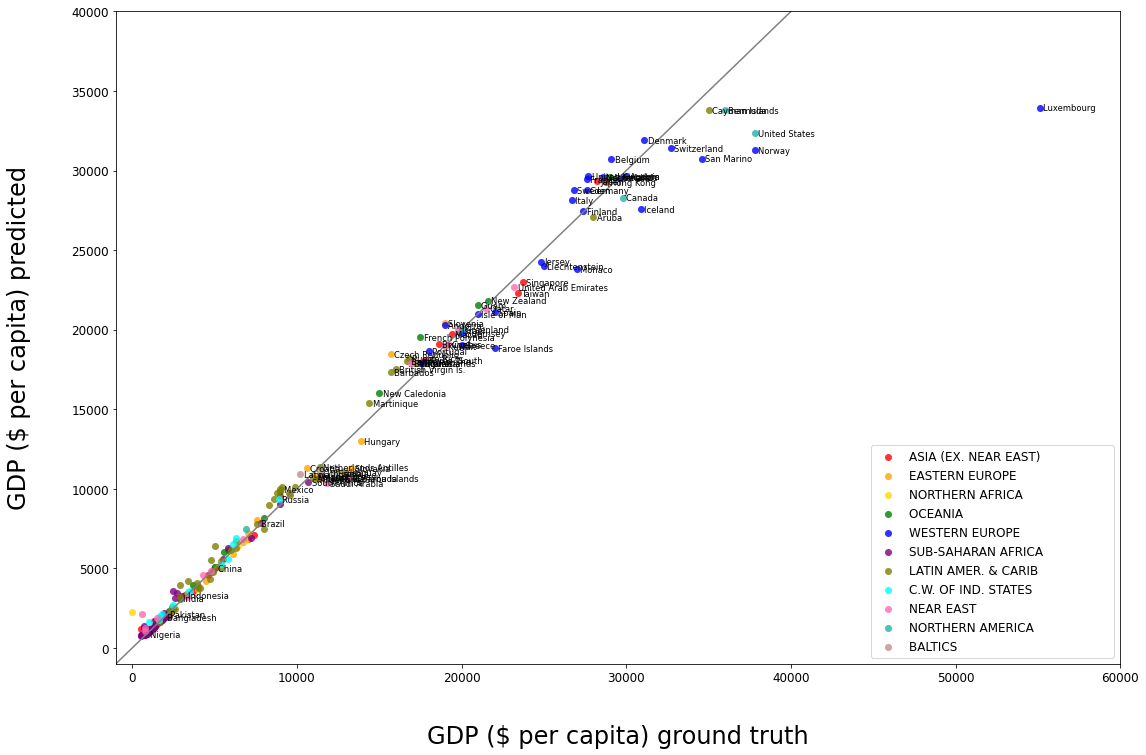

In [ ]:
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('GDP ($ per capita) ground truth',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')